# Car Price Prediction

### import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
sns.set()

### load date set

In [2]:
raw_data_df = pd.read_csv(r'1.04. Real-life example.csv')
raw_data_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### preprocessing

In [3]:
raw_data_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
raw_data_df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [6]:
raw_data_df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [7]:
raw_data_df['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
raw_data_df['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [9]:
raw_data_df['Model'].unique()

array(['320', 'Sprinter 212', 'S 500', 'Q7', 'Rav 4', 'GLS 63', 'A6',
       'Megane', 'Golf IV', '19', 'A6 Allroad', 'Passat B6',
       'Land Cruiser 100', 'Clio', '318', 'Vito', 'Hilux', 'Polo',
       'Outlander', 'A8', 'Touareg', 'Colt', 'GLS 500', '100', 'Z4',
       'Pajero Wagon', 'X5', 'Caddy', 'Camry', '528', 'TT', 'A4',
       'G 55 AMG', 'X6', 'Galant', '525', 'E-Class', 'Kangoo', 'ML 350',
       'GLS 350', '730', 'Trafic', 'X5 M', 'S 350', 'Lancer', 'Scenic',
       '330', 'Passat B5', 'A3', 'Land Cruiser Prado', 'Caravelle',
       'Avensis', 'GL 320', 'GL 350', 'GL 450', 'Lancer X', '200', '520',
       'Tiguan', 'Outlander XL', 'A5', 'X6 M', 'Golf III', 'A 150',
       'FJ Cruiser', 'Golf GTI', 'Koleos', 'T4 (Transporter)',
       'Land Cruiser 200', 'Passat B7', 'Scirocco', 'M5', 'Venza', '80',
       'V 250', 'ML 270', 'C-Class', 'Lupo', '5 Series', 'CLA 200',
       'T5 (Transporter)', 'Highlander', 'Corolla', 'CLK 240',
       'Passat CC', 'I3', 'Multivan', 'Vaneo'

In [10]:
data = raw_data_df.drop('Model',axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### missing Value

In [11]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
172/4345
#there is less than 5 percent of whole data, so we can drop null value

0.03958573072497123

In [14]:
data_no_mv = data.dropna(axis=0)

In [15]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [16]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Exploring PDF

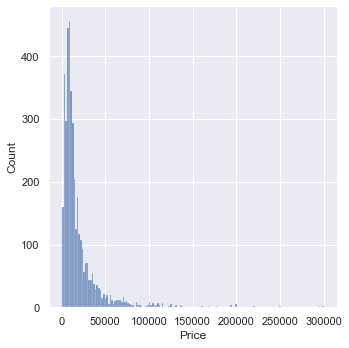

In [17]:
sns.displot(data_no_mv['Price'])
#you can see outliers

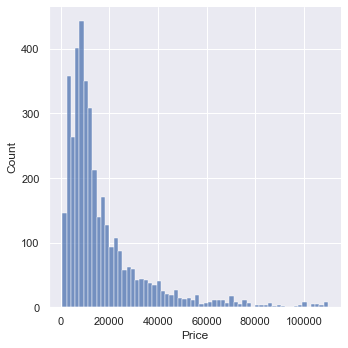

In [18]:
q = data_no_mv['Price'].quantile(0.985)
data_1 = data_no_mv[data_no_mv['Price']<q]
sns.displot(data_1['Price'])

In [19]:
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3963,3963.000000,3963,3963.000000,3963.000000,3963,3963,3963.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1516,NaN,NaN,1837,3592,NaN
mean,NaN,17297.629059,NaN,165.913954,2.740825,NaN,NaN,2006.246026
std,NaN,17510.596317,NaN,102.444678,4.968791,NaN,NaN,6.658830
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6950.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20997.620000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


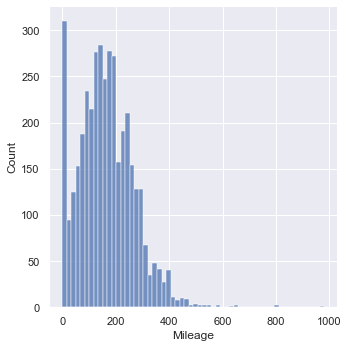

In [20]:
sns.displot(data_1['Mileage'])

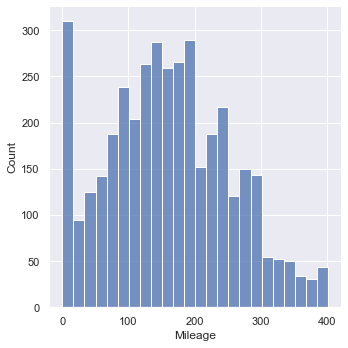

In [21]:
q = data_1['Mileage'].quantile(0.985)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'])

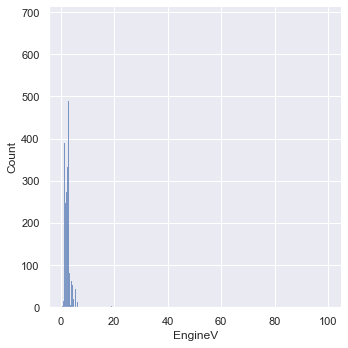

In [22]:
sns.displot(data_2['EngineV'])

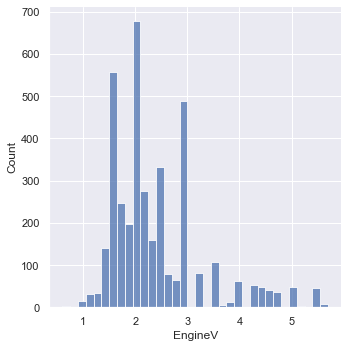

In [23]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<q]
sns.displot(data_3['EngineV'])

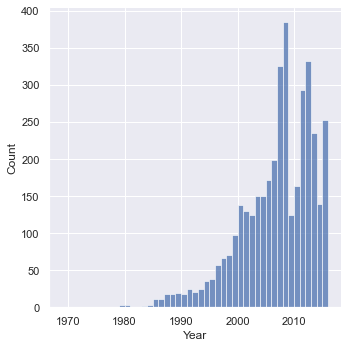

In [24]:
sns.displot(data_3['Year'])

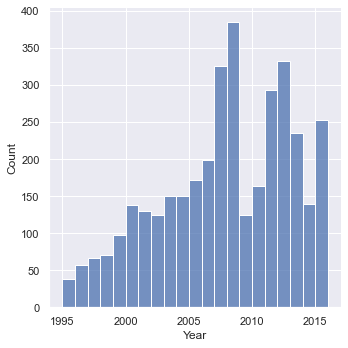

In [25]:
q = data_3['Year'].quantile(0.05)
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year'])

In [26]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3640,3640.000000,3640,3640.000000,3640.000000,3640,3640,3640.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,801,NaN,1323,NaN,NaN,1747,3294,NaN
mean,NaN,18131.967544,NaN,156.111264,2.429360,NaN,NaN,2007.386538
std,NaN,17592.734742,NaN,90.585980,0.909271,NaN,NaN,5.226529
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1995.000000
25%,NaN,7700.000000,NaN,90.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11999.000000,NaN,154.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21962.250000,NaN,220.000000,3.000000,NaN,NaN,2012.000000


### checking the OLS assumptions

#### Linearity

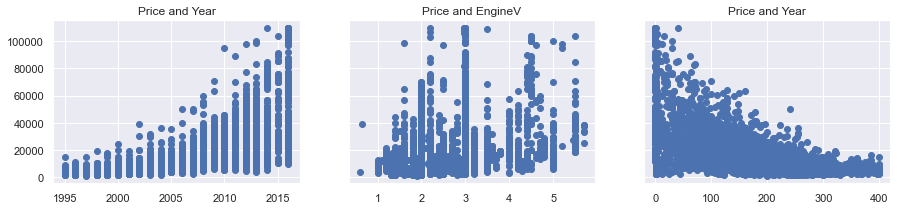

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Year')

plt.show()

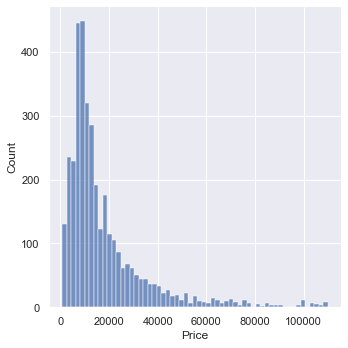

In [28]:
sns.displot(data_cleaned['Price'])

In [29]:
data_cleaned['log_Price'] = np.log(data_cleaned['Price'])
data_cleaned.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209


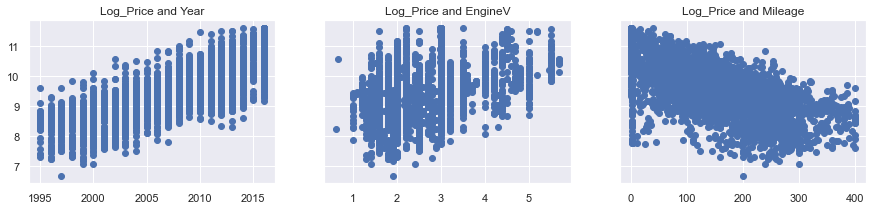

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_Price'])
ax1.set_title('Log_Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
ax2.set_title('Log_Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
ax3.set_title('Log_Price and Mileage')

plt.show()

In [31]:
data_cleaned.drop(['Price'],axis=1,inplace=True)

In [32]:
variable = data_cleaned[['Mileage','EngineV','Year']]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = variable.columns
vif['VIF'] = [variance_inflation_factor(variable.values,i)for i in range(variable.shape[1])]

In [33]:
vif

,Feature,VIF
0,Mileage,3.951185
1,EngineV,8.145276
2,Year,10.711374


In [34]:
data_cleaned.drop(['Year'],axis=1,inplace=True)

In [35]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
1,Audi,crossover,240,4.2,Petrol,yes,10.043249
2,Toyota,crossover,120,2.0,Petrol,yes,9.814656
3,Audi,vagon,200,2.7,Diesel,yes,9.560997
4,Renault,vagon,193,1.5,Diesel,yes,9.287209
...,...,...,...,...,...,...,...
3635,Renault,sedan,152,1.6,Petrol,yes,8.824678
3636,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3637,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3638,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [36]:
data_no_multicollinearty = data_cleaned.copy()

### create dummy variable

In [37]:
data_with_dummy = pd.get_dummies(data_no_multicollinearty,drop_first=True)

In [38]:
data_with_dummy.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [40]:
data_with_dummy.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
variable = data_with_dummy[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
            'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
            'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
            'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif_dummy = pd.DataFrame()
vif_dummy['featurs'] = variable.columns
vif_dummy['VIF'] = [variance_inflation_factor(variable.values,i)for i in range(variable.shape[1])]

In [43]:
vif_dummy

,featurs,VIF
0,Brand_BMW,0.228206
1,Brand_Mercedes-Benz,0.591796
2,Brand_Mitsubishi,0.175777
3,Brand_Renault,0.843580
4,Brand_Toyota,0.989404
5,Brand_Volkswagen,0.114129
6,Body_hatch,1.351060
7,Body_other,0.378505
8,Body_sedan,0.081536
9,Body_vagon,0.390494


In [44]:
data_with_dummy.columns

Index(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [49]:
cols = ['log_Price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [50]:
data_preprocessed = data_with_dummy[cols]

In [51]:
data_preprocessed.head()

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear Regression Model

In [53]:
target = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'],axis=1)

### Scale the Data

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [55]:
input_scaled = scaler.transform(inputs)

### train and test data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled,target,
                                                    test_size=0.2, random_state=62)

### Linear regression

In [58]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
y_hat = reg.predict(x_train)

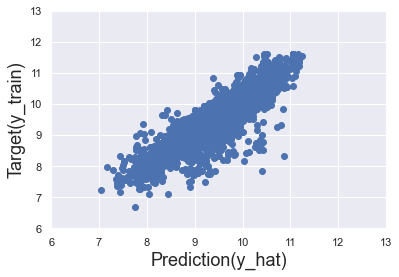

In [63]:
plt.scatter(y_hat,y_train)
plt.xlabel('Prediction(y_hat)',size=18)
plt.ylabel('Target(y_train)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

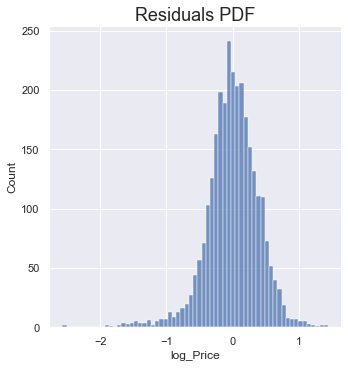

In [64]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF',size=18)

In [67]:
reg.score(x_train,y_train)

0.7648564471074499

In [68]:
reg.intercept_

9.454001316170519

In [70]:
reg_summery = pd.DataFrame(inputs.columns.values,columns=['Feature'])
reg_summery['Weight'] = reg.coef_
reg_summery

,Feature,Weight
0,Mileage,-0.423744
1,EngineV,0.197753
2,Brand_BMW,0.014566
3,Brand_Mercedes-Benz,-0.001558
4,Brand_Mitsubishi,-0.148934
5,Brand_Renault,-0.193126
6,Brand_Toyota,-0.066842
7,Brand_Volkswagen,-0.092330
8,Body_hatch,-0.134540
9,Body_other,-0.097802


### Testing

In [71]:
y_hat_test = reg.predict(x_test)

<AxesSubplot:ylabel='log_Price'>

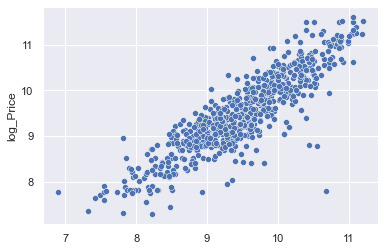

In [74]:
sns.scatterplot(x= y_hat_test,y= y_test)

<AxesSubplot:ylabel='log_Price'>

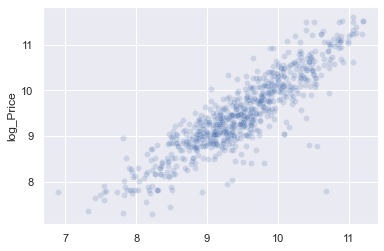

In [76]:
sns.scatterplot(x=y_hat_test,y=y_test,alpha=0.2)

In [78]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Pridiction'])
df_pf

,Pridiction
0,13398.426865
1,13109.088275
2,29449.026054
3,24835.466429
4,3872.235317
...,...
723,4692.714115
724,10992.088346
725,4019.234369
726,6304.372114


In [80]:
df_pf['Target'] = np.exp(y_test.reset_index(drop=True))
df_pf

,Pridiction,Target
0,13398.426865,10100.0
1,13109.088275,12999.0
2,29449.026054,20800.0
3,24835.466429,20500.0
4,3872.235317,3500.0
...,...,...
723,4692.714115,4600.0
724,10992.088346,19100.0
725,4019.234369,2500.0
726,6304.372114,6800.0


In [82]:
df_pf['Residual'] = df_pf['Pridiction'] - df_pf['Target']
df_pf['%Difference'] = np.abs(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Pridiction,Target,Residual,%Difference
0,13398.426865,10100.0,3298.426865,32.657692
1,13109.088275,12999.0,110.088275,0.846898
2,29449.026054,20800.0,8649.026054,41.581856
3,24835.466429,20500.0,4335.466429,21.148617
4,3872.235317,3500.0,372.235317,10.635295
...,...,...,...,...
723,4692.714115,4600.0,92.714115,2.015524
724,10992.088346,19100.0,-8107.911654,42.449799
725,4019.234369,2500.0,1519.234369,60.769375
726,6304.372114,6800.0,-495.627886,7.288645


In [83]:
df_pf.describe()

,Pridiction,Target,Residual,%Difference
count,728.000000,728.000000,728.000000,728.000000
mean,16866.771776,18723.571731,-1856.799954,32.920594
std,13025.086404,17988.702443,9221.229155,73.626553
min,992.510990,1450.000000,-66222.480504,0.000068
25%,8168.592238,7775.000000,-3537.401980,10.758650
50%,12927.044555,12000.000000,-364.823605,22.485685
75%,20976.176016,23425.000000,2046.129150,37.182298
max,72684.997972,109999.000000,40972.686641,1707.195277
